In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate example data (moons dataset)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Create the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=30)

# Fit the model to the data
clusters = dbscan.fit_predict(X_scaled)

# The `fit_predict` method returns an array of cluster assignments,
# where -1 indicates noise points (not assigned to any cluster).

In [7]:
# Extracting the number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

# Print the results
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters found: 2
Number of noise points: 6


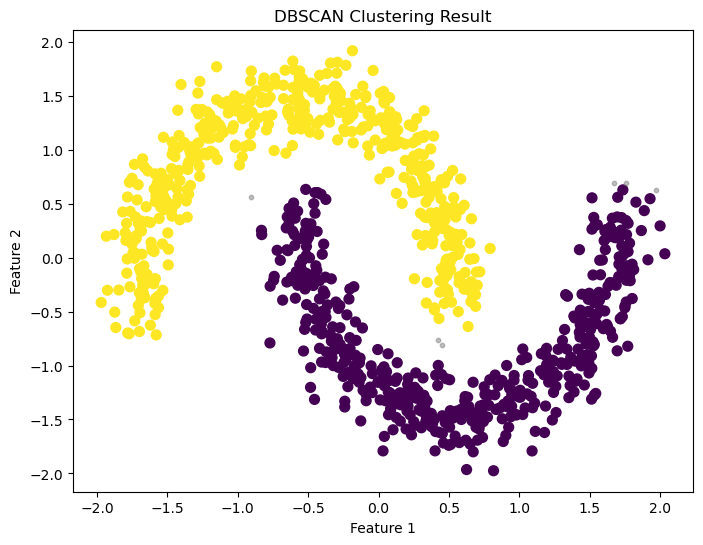

In [8]:
# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[clusters != -1][:, 0], X_scaled[clusters != -1][:, 1], c=clusters[clusters != -1], cmap='viridis', s=50)
plt.scatter(X_scaled[clusters == -1][:, 0], X_scaled[clusters == -1][:, 1], c='gray', s=10, alpha=0.5)
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
